Required Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support


Loading Dataset

In [31]:
te_df = pd.read_csv('/content/fraudTest.csv')

Preprocessing

In [33]:
te_df


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205652,205652,2020-09-01 07:38:32,4471568287204,"fraud_Watsica, Haag and Considine",shopping_pos,2.92,Dakota,Maldonado,M,369 Cochran Radial,...,36.4899,-79.4736,3402,Insurance underwriter,1927-10-24,0addfb95585d3fc4cb2570575cf17660,1.378021e+09,35.986192,-78.563979,0.0
205653,205653,2020-09-01 07:39:07,4124536010991657,fraud_Skiles-Ankunding,grocery_net,84.43,Sydney,Montoya,F,265 Christian Summit Suite 231,...,30.5012,-87.8835,27829,"Presenter, broadcasting",1954-07-21,a2be7ec2cd62a4e1dae84e81e6b7371b,1.378021e+09,31.064287,-87.186911,0.0
205654,205654,2020-09-01 07:40:32,5501083170975659,fraud_Heaney-Marquardt,entertainment,63.57,Wayne,Payne,M,587 Bradley Inlet Suite 281,...,41.1464,-81.5107,47772,Equities trader,1966-01-04,da58e41c9532f3f22542fd31f493fdd4,1.378021e+09,41.450321,-81.336363,0.0
205655,205655,2020-09-01 07:41:16,3526826139003047,fraud_Huel-Langworth,misc_net,5.71,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,a987b93a91e0016dccdbbec57f7beffa,1.378021e+09,43.825912,-84.621322,0.0


In [34]:
tr_df = pd.read_csv('/content/fraudTrain.csv')

In [35]:
tr_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228931,228931,2019-04-25 23:11:43,3567697931646329,"fraud_Cormier, Stracke and Thiel",entertainment,59.05,John,Stevens,M,428 Morgan River,...,42.2470,-73.7552,17867.0,Travel agency manager,1998-07-29,935e6a2b6dbc25e6cdf720618f87ee3f,1.335396e+09,41.703717,-72.866124,0.0
228932,228932,2019-04-25 23:13:25,4900628639996,"fraud_Hermiston, Pacocha and Smith",health_fitness,49.79,Michael,Johnson,M,094 Owens Underpass,...,33.9056,-118.0818,105549.0,Firefighter,1973-09-22,ab5d7df6333e820a6c1e03a5c902c41a,1.335396e+09,34.260464,-118.809815,0.0
228933,228933,2019-04-25 23:15:33,376445266762684,fraud_Bednar PLC,kids_pets,16.28,Rachel,Lowe,F,372 Jeffrey Course,...,41.1558,-101.1360,1789.0,Insurance broker,1982-02-11,dfbae09beaf32582b950238da43d267a,1.335396e+09,40.246368,-100.988467,0.0
228934,228934,2019-04-25 23:18:26,4586260469584,fraud_Hamill-D'Amore,health_fitness,1.99,Melody,Thompson,F,0362 Anderson Wall,...,40.1362,-95.2138,1631.0,Architect,1953-01-20,f253e0c88c295d8658fcf47bf48a470d,1.335396e+09,41.008315,-94.929356,0.0


In [37]:
tr_df.shape

(228936, 23)

In [39]:
tr_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [40]:

te_df.drop_duplicates(inplace=True)

In [41]:
df = pd.concat([tr_df, te_df],ignore_index=True)
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434588,205652,2020-09-01 07:38:32,4471568287204,"fraud_Watsica, Haag and Considine",shopping_pos,2.92,Dakota,Maldonado,M,369 Cochran Radial,...,36.4899,-79.4736,3402.0,Insurance underwriter,1927-10-24,0addfb95585d3fc4cb2570575cf17660,1.378021e+09,35.986192,-78.563979,0.0
434589,205653,2020-09-01 07:39:07,4124536010991657,fraud_Skiles-Ankunding,grocery_net,84.43,Sydney,Montoya,F,265 Christian Summit Suite 231,...,30.5012,-87.8835,27829.0,"Presenter, broadcasting",1954-07-21,a2be7ec2cd62a4e1dae84e81e6b7371b,1.378021e+09,31.064287,-87.186911,0.0
434590,205654,2020-09-01 07:40:32,5501083170975659,fraud_Heaney-Marquardt,entertainment,63.57,Wayne,Payne,M,587 Bradley Inlet Suite 281,...,41.1464,-81.5107,47772.0,Equities trader,1966-01-04,da58e41c9532f3f22542fd31f493fdd4,1.378021e+09,41.450321,-81.336363,0.0
434591,205655,2020-09-01 07:41:16,3526826139003047,fraud_Huel-Langworth,misc_net,5.71,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,a987b93a91e0016dccdbbec57f7beffa,1.378021e+09,43.825912,-84.621322,0.0


In [42]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
434588,205652,2020-09-01 07:38:32,4471568287204,"fraud_Watsica, Haag and Considine",shopping_pos,2.92,Dakota,Maldonado,M,369 Cochran Radial,...,36.4899,-79.4736,3402.0,Insurance underwriter,1927-10-24,0addfb95585d3fc4cb2570575cf17660,1.378021e+09,35.986192,-78.563979,0.0
434589,205653,2020-09-01 07:39:07,4124536010991657,fraud_Skiles-Ankunding,grocery_net,84.43,Sydney,Montoya,F,265 Christian Summit Suite 231,...,30.5012,-87.8835,27829.0,"Presenter, broadcasting",1954-07-21,a2be7ec2cd62a4e1dae84e81e6b7371b,1.378021e+09,31.064287,-87.186911,0.0
434590,205654,2020-09-01 07:40:32,5501083170975659,fraud_Heaney-Marquardt,entertainment,63.57,Wayne,Payne,M,587 Bradley Inlet Suite 281,...,41.1464,-81.5107,47772.0,Equities trader,1966-01-04,da58e41c9532f3f22542fd31f493fdd4,1.378021e+09,41.450321,-81.336363,0.0
434591,205655,2020-09-01 07:41:16,3526826139003047,fraud_Huel-Langworth,misc_net,5.71,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,a987b93a91e0016dccdbbec57f7beffa,1.378021e+09,43.825912,-84.621322,0.0
434592,205656,2020-09-01 07:41:25,4384910379661778,fraud_Pacocha-O'Reilly,grocery_pos,95.04,Michelle,Russell,F,55505 Christy Via,...,46.9777,-96.4092,4508.0,Naval architect,1949-04-24,4a4ad13d0c113c4948135cb63,NaN,NaN,NaN,NaN


In [43]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [44]:
df.shape

(434593, 23)

In [45]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434593 entries, 0 to 434592
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             434593 non-null  int64  
 1   trans_date_trans_time  434593 non-null  object 
 2   cc_num                 434593 non-null  int64  
 3   merchant               434593 non-null  object 
 4   category               434592 non-null  object 
 5   amt                    434592 non-null  float64
 6   first                  434592 non-null  object 
 7   last                   434592 non-null  object 
 8   gender                 434592 non-null  object 
 9   street                 434592 non-null  object 
 10  city                   434592 non-null  object 
 11  state                  434592 non-null  object 
 12  zip                    434592 non-null  float64
 13  lat                    434592 non-null  float64
 14  long                   434592 non-nu

In [47]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,434593.000000,4.345930e+05,434592.000000,434592.000000,434592.000000,434592.000000,4.345920e+05,4.345910e+05,434591.000000,434591.000000,434591.000000
mean,108959.485256,4.170674e+17,70.098512,48809.909331,38.536812,-90.214400,8.923954e+04,1.351635e+09,38.536283,-90.214260,0.006100
std,63265.038425,1.308541e+18,153.131759,26873.123021,5.073333,13.742665,3.024155e+05,2.218587e+07,5.108259,13.755275,0.077864
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671575,0.000000
25%,54324.000000,1.800365e+14,9.650000,26237.000000,34.668900,-96.798000,7.430000e+02,1.330790e+09,34.745995,-96.881148,0.000000
50%,108648.000000,3.519607e+15,47.470000,48174.000000,39.354300,-87.461600,2.443000e+03,1.334956e+09,39.361122,-87.419745,0.000000
75%,162972.000000,4.635331e+15,83.220000,72011.000000,41.894800,-80.158000,2.047800e+04,1.374750e+09,41.955667,-80.242518,0.000000
max,228935.000000,4.992346e+18,17897.240000,99783.000000,66.693300,-67.950300,2.906700e+06,1.378021e+09,67.510267,-66.952352,1.000000


DATA VISUALIZATION

In [48]:
df['year']=pd.to_datetime(df['trans_date_trans_time']).dt.year
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.day
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
df.drop(['trans_date_trans_time'],axis=1,inplace=True)
df

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,2019,1,1,0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,2019,1,1,0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,2019,1,1,0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,2019,1,1,0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,2019,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434588,205652,4471568287204,"fraud_Watsica, Haag and Considine",shopping_pos,2.92,Dakota,Maldonado,M,369 Cochran Radial,Pelham,...,1927-10-24,0addfb95585d3fc4cb2570575cf17660,1.378021e+09,35.986192,-78.563979,0.0,2020,9,1,7
434589,205653,4124536010991657,fraud_Skiles-Ankunding,grocery_net,84.43,Sydney,Montoya,F,265 Christian Summit Suite 231,Fairhope,...,1954-07-21,a2be7ec2cd62a4e1dae84e81e6b7371b,1.378021e+09,31.064287,-87.186911,0.0,2020,9,1,7
434590,205654,5501083170975659,fraud_Heaney-Marquardt,entertainment,63.57,Wayne,Payne,M,587 Bradley Inlet Suite 281,Cuyahoga Falls,...,1966-01-04,da58e41c9532f3f22542fd31f493fdd4,1.378021e+09,41.450321,-81.336363,0.0,2020,9,1,7
434591,205655,3526826139003047,fraud_Huel-Langworth,misc_net,5.71,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1955-07-06,a987b93a91e0016dccdbbec57f7beffa,1.378021e+09,43.825912,-84.621322,0.0,2020,9,1,7


In [60]:
year_df = df.groupby('year').size().reset_index(name='Count')



In [66]:
import plotly.express as px


bar_year = px.bar(year_df, x='year', y='Count',
                  labels={'year': 'Year', 'Count': 'Number of Transactions'},
                  title='Transactions Count by Year', color_discrete_sequence=['#1f77b4'])
bar_year.show()

Analysis of transactions by Month.

In [68]:
month_df = df.groupby('month').size().reset_index(name='Count')


bar_month = px.bar(month_df, x='month', y='Count', labels={'month': 'Month', 'Count': 'Number of Transactions'},title='Transactions Count by Month', color_discrete_sequence=['#1f77b4'])
bar_trace = bar_month['data'][0]
bar_month.show()

Distribution of Fraudulent and Legitimate Transactions.

In [69]:
fraud_count=df['is_fraud'].value_counts()
fraud_count

is_fraud
0.0    431940
1.0      2651
Name: count, dtype: int64

In [72]:
pie_chart = px.pie(fraud_count,
                  values=fraud_count.values,
                  names=fraud_count.index,
                  color=fraud_count.index,
                  title='Distribution of Fraudulent Transactions',
                  labels={'values': 'Frequency', 'names': 'is_fraud'},
                       hole=.4,)
pie_chart.update_traces(textinfo='label+percent', pull=[0.1, 0.1, 0.1, 0.1, 0.1])
pie_chart.update_layout(font=dict(size=14, color="red"), height=500,template='plotly',)
pie_chart.show()





gender based transactions

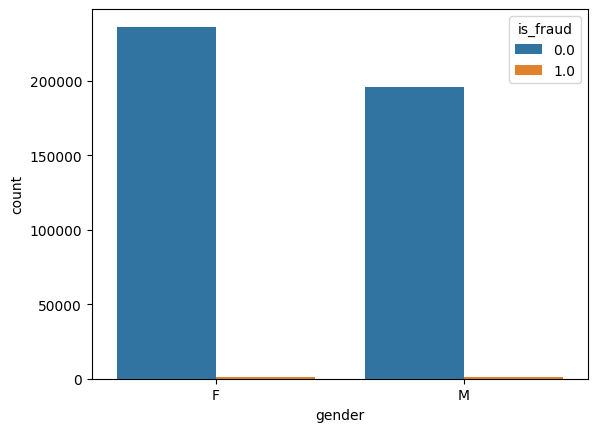

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='gender', data=df, hue='is_fraud')

plt.show()




Analysis of Fraudulent Transactions by Year

In [79]:
df_fraud = df.loc[(df['is_fraud'] != 0)]
df_fraud

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour
2449,2449,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1.325466e+09,36.430124,-81.179483,1.0,2019,1,2,1
2472,2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1.325469e+09,29.819364,-99.142791,1.0,2019,1,2,1
2523,2523,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1960-10-28,b98f12f4168391b2203238813df5aa8c,1.325474e+09,29.273085,-98.836360,1.0,2019,1,2,3
2546,2546,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1.325475e+09,35.909292,-82.091010,1.0,2019,1,2,3
2553,2553,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1.325477e+09,29.786426,-98.683410,1.0,2019,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433577,204641,6596735789587928,fraud_Torphy-Kertzmann,health_fitness,25.43,Spencer,Williams,M,1145 Tony Drive Suite 080,Watertown,...,1959-01-15,4158e2cf46f4160422324f433bb1998f,1.377993e+09,45.410151,-93.372839,1.0,2020,8,31,23
433629,204693,4003989662068504,fraud_Nader-Heller,misc_net,796.45,Chris,White,M,98897 Bennett Lodge,Bessemer,...,1989-02-08,8a410228aeeda700396febfeceabf56c,1.377995e+09,33.089968,-87.354732,1.0,2020,9,1,0
433743,204807,4003989662068504,fraud_Bednar Group,misc_net,872.36,Chris,White,M,98897 Bennett Lodge,Bessemer,...,1989-02-08,c29926f82e60e6ca6c0aad579380f539,1.377998e+09,33.258487,-87.189499,1.0,2020,9,1,1
434306,205370,180052752563109,fraud_Hackett-Lueilwitz,grocery_pos,289.49,Evan,Santiago,M,9652 Ford Ford Apt. 566,Arlington,...,1968-11-14,221d7dcdfffe6b884e7f9b73fa2ff65d,1.378013e+09,38.054349,-76.799112,1.0,2020,9,1,5


In [80]:


year_df = df_fraud.groupby('year').size().reset_index(name='Count')

#Barchart using Plotly Express
bar_year = px.bar(year_df, x='year', y='Count', labels={'year': 'Year', 'Count': 'Number of Transactions'},title='Transactions Count by Year', color_discrete_sequence=['#1f77b4'])
bar_trace = bar_year['data'][0]
bar_year.show()



Analysis of Fraudulent transactions by month and hour.

In [81]:


#Group by month
month_df = df_fraud.groupby('month').size().reset_index(name='Count')

#Barchart using Plotly Express
bar_month = px.bar(month_df, x='month', y='Count', labels={'month': 'Month', 'Count': 'Number of Transactions'},title='Transactions Count by Month', color_discrete_sequence=['#1f77b4'])
bar_trace = bar_month['data'][0]
bar_month.show()



In [82]:
#Group by hour
hour_df = df_fraud.groupby('hour').size().reset_index(name='Count')

#Barchart using Plotly Express
bar_hour = px.bar(hour_df, x='hour', y='Count', labels={'hour': 'Hour', 'Count': 'Number of Transactions'},title='Transactions Count by Month', color_discrete_sequence=['#1f77b4'])
bar_trace = bar_hour['data'][0]
bar_hour.show()


Gender based Fraudulent Transactions.

In [83]:
gender_count=df_fraud['gender'].value_counts()
gender_count

gender
F    1453
M    1199
Name: count, dtype: int64

In [84]:
funnel_chart_area=px.funnel_area(gender_count,gender_count.index,gender_count.values,
                                 title='Gender based Fraudulent transactions')
funnel_chart_area.show()

DATA PREPROCESSING

In [85]:
df1=pd.get_dummies(df['category'],drop_first=True)
df1

,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434588,False,False,False,False,False,False,False,False,False,False,False,True,False
434589,False,False,True,False,False,False,False,False,False,False,False,False,False
434590,False,False,False,False,False,False,False,False,False,False,False,False,False
434591,False,False,False,False,False,False,False,True,False,False,False,False,False


In [86]:
df2=pd.concat([df,df1],axis=1)
df2

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,False,False,False,False,True,False,False,False,False,False
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,True,False,False,False,False,False,False,False,False,False
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,False,False,False,False,False,False,False,False,False,False
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,False,False,False,False,False,False,False,False,False,False
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434588,205652,4471568287204,"fraud_Watsica, Haag and Considine",shopping_pos,2.92,Dakota,Maldonado,M,369 Cochran Radial,Pelham,...,False,False,False,False,False,False,False,False,True,False
434589,205653,4124536010991657,fraud_Skiles-Ankunding,grocery_net,84.43,Sydney,Montoya,F,265 Christian Summit Suite 231,Fairhope,...,False,False,False,False,False,False,False,False,False,False
434590,205654,5501083170975659,fraud_Heaney-Marquardt,entertainment,63.57,Wayne,Payne,M,587 Bradley Inlet Suite 281,Cuyahoga Falls,...,False,False,False,False,False,False,False,False,False,False
434591,205655,3526826139003047,fraud_Huel-Langworth,misc_net,5.71,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,False,False,False,False,True,False,False,False,False,False


In [89]:
df2.drop(['Unnamed: 0','merchant','category','first','last','street','city',
          'state','job','dob','trans_num','cc_num','lat','long','merch_lat','merch_long'],axis=1,inplace=True)
df2


,amt,gender,zip,city_pop,unix_time,is_fraud,year,month,day,hour,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4.97,F,28654.0,3495.0,1.325376e+09,0.0,2019,1,1,0,...,False,False,False,False,True,False,False,False,False,False
1,107.23,F,99160.0,149.0,1.325376e+09,0.0,2019,1,1,0,...,True,False,False,False,False,False,False,False,False,False
2,220.11,M,83252.0,4154.0,1.325376e+09,0.0,2019,1,1,0,...,False,False,False,False,False,False,False,False,False,False
3,45.00,M,59632.0,1939.0,1.325376e+09,0.0,2019,1,1,0,...,False,False,False,False,False,False,False,False,False,False
4,41.96,M,24433.0,99.0,1.325376e+09,0.0,2019,1,1,0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434588,2.92,M,27311.0,3402.0,1.378021e+09,0.0,2020,9,1,7,...,False,False,False,False,False,False,False,False,True,False
434589,84.43,F,36532.0,27829.0,1.378021e+09,0.0,2020,9,1,7,...,False,False,False,False,False,False,False,False,False,False
434590,63.57,M,44223.0,47772.0,1.378021e+09,0.0,2020,9,1,7,...,False,False,False,False,False,False,False,False,False,False
434591,5.71,M,49632.0,1126.0,1.378021e+09,0.0,2020,9,1,7,...,False,False,False,False,True,False,False,False,False,False


In [91]:
df2.dtypes


amt               float64
gender             object
zip               float64
city_pop          float64
unix_time         float64
is_fraud          float64
year                int32
month               int32
day                 int32
hour                int32
food_dining          bool
gas_transport        bool
grocery_net          bool
grocery_pos          bool
health_fitness       bool
home                 bool
kids_pets            bool
misc_net             bool
misc_pos             bool
personal_care        bool
shopping_net         bool
shopping_pos         bool
travel               bool
dtype: object

In [92]:

df2.isna().sum()

amt               1
gender            1
zip               1
city_pop          1
unix_time         2
is_fraud          2
year              0
month             0
day               0
hour              0
food_dining       0
gas_transport     0
grocery_net       0
grocery_pos       0
health_fitness    0
home              0
kids_pets         0
misc_net          0
misc_pos          0
personal_care     0
shopping_net      0
shopping_pos      0
travel            0
dtype: int64

In [93]:
for col in df2.columns:
  if df2[col].dtype in ['int64','float64']:
        Q1 = df2[col].quantile(0.25)
        Q3 = df2[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR
        df3 = df2.loc[(df2[col]>=lower_bound)&(df2[col]<=upper_bound)]

#Display the cleaned dataframe
        print("Cleaned dataframe:")
        df3
df3.reset_index(drop=True,inplace=False)

Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:
Cleaned dataframe:


,amt,gender,zip,city_pop,unix_time,is_fraud,year,month,day,hour,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4.97,F,28654.0,3495.0,1.325376e+09,0.0,2019,1,1,0,...,False,False,False,False,True,False,False,False,False,False
1,107.23,F,99160.0,149.0,1.325376e+09,0.0,2019,1,1,0,...,True,False,False,False,False,False,False,False,False,False
2,220.11,M,83252.0,4154.0,1.325376e+09,0.0,2019,1,1,0,...,False,False,False,False,False,False,False,False,False,False
3,45.00,M,59632.0,1939.0,1.325376e+09,0.0,2019,1,1,0,...,False,False,False,False,False,False,False,False,False,False
4,41.96,M,24433.0,99.0,1.325376e+09,0.0,2019,1,1,0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431935,143.32,F,7439.0,2456.0,1.378021e+09,0.0,2020,9,1,7,...,True,False,False,False,False,False,False,False,False,False
431936,2.92,M,27311.0,3402.0,1.378021e+09,0.0,2020,9,1,7,...,False,False,False,False,False,False,False,False,True,False
431937,84.43,F,36532.0,27829.0,1.378021e+09,0.0,2020,9,1,7,...,False,False,False,False,False,False,False,False,False,False
431938,63.57,M,44223.0,47772.0,1.378021e+09,0.0,2020,9,1,7,...,False,False,False,False,False,False,False,False,False,False


In [95]:

x = df3.drop(['is_fraud'], axis=1).values
x



array([[4.97, 'F', 28654.0, ..., False, False, False],
       [107.23, 'F', 99160.0, ..., False, False, False],
       [220.11, 'M', 83252.0, ..., False, False, False],
       ...,
       [84.43, 'F', 36532.0, ..., False, False, False],
       [63.57, 'M', 44223.0, ..., False, False, False],
       [5.71, 'M', 49632.0, ..., False, False, False]], dtype=object)

In [96]:
y=df3['is_fraud'].values
y

array([0., 0., 0., ..., 0., 0., 0.])